# TP Appreentissage Supervisé (Excercice 3)
##          Naive Bayes sur l'analyse des sentiments

##                     Goumeida Ahmed Seyfeddine 


### 1. La 1ére dataset: Analyse des sentiments (Client_Reviews.csv)

######  1 - packages :

In [358]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


######  2 - dataset import :


In [359]:
df = pd.read_csv('./Client_Reviews.csv')

df.head()
df.describe()
df.std()
# Remplacer les cases vides par un text vide
df['Review Text'] = df['Review Text'].fillna('')

#####  3 -  insertion d'une nouvelle colonne 'Result' = 
- 'BAD' si Rating = 1-2,
- 'NEUTRAL' si Rating = 3
- 'GOOD' si Rating = 4-5

In [360]:
for index, row in df.iterrows():
    if row.Rating <= 2:
        df.loc[index, 'Resultat'] = 'Bad'
    elif row.Rating == 3:
        df.loc[index, 'Resultat'] = 'Neutral'
    else:
        df.loc[index, 'Resultat'] = 'Good'


######  4 - Appren & Test : 

In [361]:
Appren, Test = train_test_split(df, train_size = 0.7, random_state = 0)

###### 5 - Préparation des données pour le model : 

In [362]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')

X_Appren = vector.fit_transform(Appren['Review Text'])
Y_Appren = Appren['Resultat']
X_Test = vector.transform(Test['Review Text'])
Y_Test = Test['Resultat']

######  6 - Naive Bayes :

In [363]:
NB = MultinomialNB()
NB.fit(X_Appren, Y_Appren)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

###### 7 - Prédiction des sorties selon les entrées de Test: X_Test  : 


In [364]:
prediction = NB.predict(X_Test)

###### 8 - score du model et quelques resutats  : 


In [365]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(Y_Test, prediction))


Accuracy score:  0.8189043428895827


####  on remarque que la précision et trés élevée = 0.81 (81%) on utilisant 70% des données (entrées) pour apprentissage 


In [366]:
import sklearn.metrics as mt
print(mt.classification_report(Y_Test, prediction))

              precision    recall  f1-score   support

         Bad       0.62      0.35      0.45       728
        Good       0.87      0.96      0.92      5465
     Neutral       0.41      0.29      0.34       853

    accuracy                           0.82      7046
   macro avg       0.63      0.54      0.57      7046
weighted avg       0.79      0.82      0.80      7046



####  pour avoir plus de detaille sur la précision :
####  on peut predire de 87% de précision les (GOOD REVIEWS) et de 62% de précision (BAD REVIEWS)   
####  mais c'est un peu difficile de prédire (NEUTRAL REVIEWS) 41% de précision 


###### 9 - Table de confusion : 


[[ 256  262  210]
 [  46 5263  156]
 [ 111  491  251]]


Text(91.68, 0.5, 'Résultat Prédit')

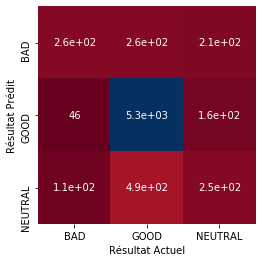

In [367]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(Y_Test, prediction)
print(cm)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['BAD', 'GOOD', 'NEUTRAL'], yticklabels=['BAD', 'GOOD', 'NEUTRAL'])
plt.xlabel('Résultat Actuel')
plt.ylabel('Résultat Prédit')


####  la table de confusion confirme que les GOOD sont les bien prédits ensuite les BAD et a la fin les NEUTRAL 



###### 10 -  comparaison : la sortie prédie & la sortie actuelle

In [368]:

check_df = pd.DataFrame({'actual_label': list(Y_Test), 'prediction': prediction})

print(check_df)

     actual_label prediction
0            Good    Neutral
1            Good       Good
2            Good       Good
3            Good       Good
4            Good    Neutral
...           ...        ...
7041         Good       Good
7042         Good       Good
7043         Good       Good
7044         Good       Good
7045         Good       Good

[7046 rows x 2 columns]


analyse selon la colonne Rating

Accuracy score:  0.6297189894975873
              precision    recall  f1-score   support

           1       0.56      0.10      0.17       246
           2       0.33      0.07      0.12       482
           3       0.38      0.37      0.38       853
           4       0.38      0.33      0.36      1472
           5       0.75      0.89      0.81      3993

    accuracy                           0.63      7046
   macro avg       0.48      0.35      0.37      7046
weighted avg       0.59      0.63      0.60      7046

[[  25   39  110   35   37]
 [  13   34  242  104   89]
 [   5   21  318  286  223]
 [   1    4  124  492  851]
 [   1    6   44  374 3568]]
      actual_label  prediction
0                4           3
1                5           5
2                5           5
3                5           5
4                4           3
...            ...         ...
7041             5           5
7042             4           5
7043             5           5
7044             5      

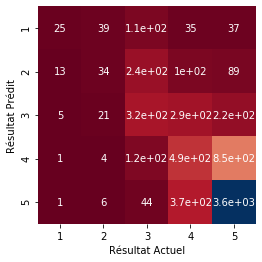

In [369]:
Appren_2, Test_2 = train_test_split(df, train_size = 0.7, random_state = 0)
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')

X_Appren_2 = vector.fit_transform(Appren['Review Text'])
Y_Appren_2 = Appren['Rating']
X_Test_2 = vector.transform(Test['Review Text'])
Y_Test_2 = Test['Rating']

NB_2 = MultinomialNB()
NB_2.fit(X_Appren_2, Y_Appren_2)

prediction_2 = NB_2.predict(X_Test_2)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(Y_Test_2, prediction_2))

import sklearn.metrics as mt
print(mt.classification_report(Y_Test_2, prediction_2))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_2 = confusion_matrix(Y_Test_2, prediction_2)
print(cm_2)
sns.heatmap(cm_2, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['1', '2', '3', '4', '5'], yticklabels=['1', '2', '3', '4', '5'])
plt.xlabel('Résultat Actuel')
plt.ylabel('Résultat Prédit')


check_df_2 = pd.DataFrame({'actual_label': list(Y_Test_2), 'prediction': prediction_2})

print(check_df_2)



### 1. La 2ére dataset: Analyse des sentiments (Sentiment.csv)

de la méme maniere que DATASET 1 

Accuracy score:  0.835
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        96
           1       0.83      0.86      0.84       104

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

[[78 18]
 [15 89]]
     actual_label  prediction
0               0           0
1               0           0
2               0           0
3               1           1
4               0           0
..            ...         ...
195             1           1
196             1           1
197             1           1
198             0           0
199             0           0

[200 rows x 2 columns]


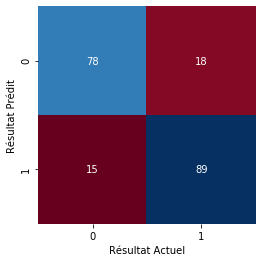

In [370]:
df_2 = pd.read_csv('./Sentiment.csv')

df_2.head()
df_2.describe()

Appren_2, Test_2 = train_test_split(df_2, train_size = 0.8, random_state = 0)

X_Appren_3 = vector.fit_transform(Appren_2['Text'])
Y_Appren_3 = Appren_2['Result']
X_Test_3 = vector.transform(Test_2['Text'])
Y_Test_3 = Test_2['Result']

NB_3 = MultinomialNB()
NB_3.fit(X_Appren_3, Y_Appren_3)

prediction_3 = NB_3.predict(X_Test_3)

from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(Y_Test_3, prediction_3))

import sklearn.metrics as mt
print(mt.classification_report(Y_Test_3, prediction_3))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm_3 = confusion_matrix(Y_Test_3, prediction_3)
print(cm_3)
sns.heatmap(cm_3, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Résultat Actuel')
plt.ylabel('Résultat Prédit')

check_df_3 = pd.DataFrame({'actual_label': list(Y_Test_3), 'prediction': prediction_3})

print(check_df_3)